In [2]:
import seaborn as sns
import numpy as np
from algos import *
import pandas as pd

In [5]:

base_T = 200
base_B = np.array([40,40])
A = np.array([[1,1,0,0,1,1],[0,0,1,1,1,1]])
p = np.array([0.2,0.2,0.2,0.2,0.1,0.1])
r = np.array([10,6,10,5,9,8])

n_samples = 30
#----- Input data ends -----

d = len(A[:,0])
n = len(A[0,:])
resources = np.array(range(0,d))
types = np.array(range(0,n))

df_list = []

for i in range(1, 11):
    k = i
    print(f"Running i: {i}, k: {k}")
    B = base_B * k
    T = round( base_T * (k + k ** 0.7) ) 
    
    J = sample_arrival(T,types,p,n_samples)
    r_offline = offline_packing(T,B,A,types,resources,p,r,J,n_samples)
    r_bayes = bayes_packing(T,B,A,types,resources,p,r,J,n_samples)
    r_irt = irt(T,B,A,types,resources,p,r,J,n_samples)
    r_frt = frt(T,B,A,types,resources,p,r,J,n_samples)
    r_rr = resolve_randomize(T,B,A,types,resources,p,r,J,n_samples)
#     r_sr = static_randomize(T,B,A,types,resources,p,r,J,n_samples)
    
    results_map = {
#         "offline": r_offline,
        "bayes": r_bayes,
        "irt": r_irt,
        "frt": r_frt,
        "rr": r_rr,
#         "sr": r_sr,
    }
    for algo, rvec in results_map.items():
        for sample in range(n_samples):
            df_list.append({
                "sample": sample,
                "T": T,
                "algo": algo,
                "r": rvec[sample],
                "reg": r_offline[sample] - rvec[sample],
            })
    
df = pd.DataFrame(df_list)

Running i: 1, k: 1
Running i: 2, k: 2
Running i: 3, k: 3
Running i: 4, k: 4
Running i: 5, k: 5
Running i: 6, k: 6
Running i: 7, k: 7
Running i: 8, k: 8
Running i: 9, k: 9
Running i: 10, k: 10


<AxesSubplot:xlabel='T', ylabel='reg'>

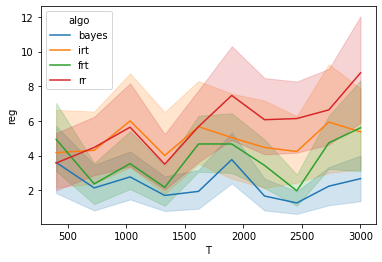

In [7]:
sns.lineplot(x="T", y="reg", data=df, hue="algo", ci=90)

<AxesSubplot:xlabel='T', ylabel='reg'>

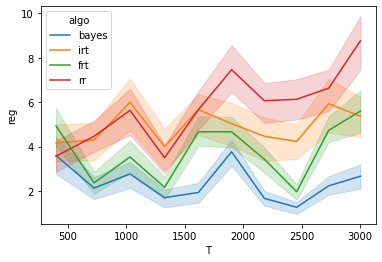

In [9]:
sns.lineplot(x="T", y="reg", data=df, hue="algo", ci=50)